<figure>
<img src = "https://drive.google.com/uc?export=view&id=1T_XBSH6ozmhGiDz_nL4bQvvonHUpbCfW" height = "200">
<img src = "https://drive.google.com/uc?export=view&id=13nSrrIowiFPjAgiR--Nd4cHLVwvXFaFj" height = "400">

In [38]:
# Import libraries
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import dfcols
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# from imblearn.over_sampling import SMOTE
# import feat_trans

## Reading in file

In [39]:
# Read files to pandas dataframes
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
sample_submission = pd.read_csv('data/SampleSubmission.csv')

## Manipulating data and pre-processing

In [40]:
from dfcols import all_square_cols

main_cols = train.columns.difference(['Sample_ID', 'Label'])
elevationCols = all_square_cols("slope")

elevationCols = train[elevationCols]

for col in elevationCols:
    curCol = elevationCols[col]
    elevationCols[col] = pd.cut(curCol, [0,5,22,34,55,100], labels=[0,1,2,3,4])

train = train.replace(elevationCols)

noSlide = train['Label'] == True
train_try = train[noSlide]
train = train.append([train_try]*3, ignore_index=True)

X = train[main_cols]
y = train.Label
# X, y = SMOTE().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2022)


# Actually training the model on the data
## Defining our models

In [41]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          SVC(gamma='auto', random_state=42)))
]
# Train model
model = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

## Training the model

In [42]:
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the auc score of the model
print(f'RandomForest F1 score on the X_test is: {f1_score(y_test, y_pred)}\n')

RandomForest F1 score on the X_test is: 0.9488591660110148



## Outputting to file

In [43]:
test_df = test[main_cols]
predictions = model.predict(test_df)

# Create a submission file
sub_file = pd.DataFrame({'Sample_ID': test.Sample_ID, 'Label': predictions})
sub_file.to_csv('Baseline.csv', index = False)

## Analytics

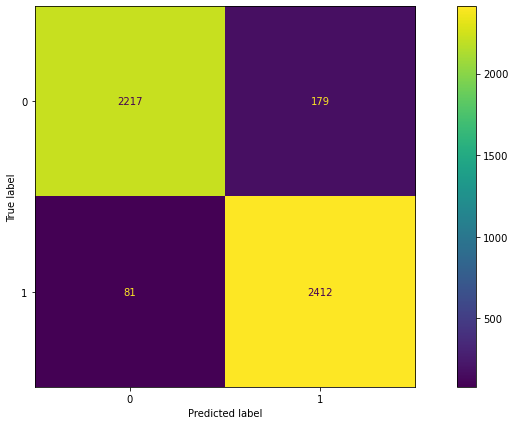

In [44]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()